# 📌 Урок: Модульная разработка для проекта интегрированного моделирования активов
# 📖 Теоретический минимум
## 🔹 Что такое модульная разработка?
Модульная разработка — это подход к созданию ПО, при котором программа разбивается на независимые, функционально завершенные компоненты (модули). Каждый модуль:

* Выполняет одну конкретную задачу

* Имеет четко определенный интерфейс

* Может разрабатываться и тестироваться отдельно

## 🔹 Основные принципы:

* Принцип единственной ответственности — один модуль = одна функция

* Низкая связность — модули минимально зависят друг от друга

* Высокая сцепленность — элементы внутри модуля тесно связаны

* Инкапсуляция — скрытие внутренней реализации

## 🔹 Преимущества:

* Упрощение разработки и отладки

* Возможность повторного использования кода

* Упрощение командной работы

* Гибкость при внесении изменений

## 📖  Лучшие практики
🔹 Для нефтегазового моделирования:

* Четкое разделение моделей - отдельные модули для IPR, VLP, узлового анализа

* Документация формул - явное описание используемых уравнений в docstring

* Параметризация расчетов - вынос констант в конфигурационные файлы

* Валидация входных данных - проверка физических ограничений параметров


## 📖 Материалы

https://vkvideo.ru/video-194554202_456239677

https://vkvideo.ru/playlist/-16108331_55984952









# 🏆 Задания

Вспомним прошлый семестр (https://colab.research.google.com/drive/1yWu1QHXWOmCFUbFpzgHlGx5MJnmC0vJG?usp=sharing) и на основе вашей реализации  скважин и притока создадим проект для интегрированного моделирования.


## 1️⃣  README.MD
**Задача:**
Создайте папку для вашего проекта и положите в нее текстовый файл README.MD , в котором объясните что это за проект, как у строен и как им пользоваться

Добавьте красивую схему формата
```
# Структура проекта
IMA_project/
├── main.py # Основной скрипт запуска программы
├── readme.md # Описание проекта и инструкции по использованию
├── requirements.txt # Список зависимостей Python для установки
├── nodal_analysis/
│
├── init.py # Инициализация пакета анализа узлов
│
└── solver.py # Реализация методов решения уравнений
    │
    ├── inflow_performance/
        │
        ├── init.py # Инициализация пакета входящей производительности
        │
        └── ipr_model.py # Модели IPR (Inflow Performance Relationship)
    │
    └── outflow_performance/
        ├── init.py # Инициализация пакета исходящей производительности
        └── vlp_model.py # Модели VLP (Vertical Lift Performance)


```

```
# Структура проекта
IMA_project/
├── main.py # Основной скрипт запуска программы
├── readme.md # Описание проекта и инструкции по использованию
├── requirements.txt # Список зависимостей Python для установки
├── nodal_analysis/
│
├── init.py # Инициализация пакета анализа узлов
│
└── solver # Реализация методов решения уравнений
    │
    ├── inflow_performance/
        │
        ├── init.py # Инициализация пакета входящей производительности
        │
        └── ipr_model.py # Модели IPR (Inflow Performance Relationship)
    │
    └── outflow_performance/
        ├── init.py # Инициализация пакета исходящей производительности
        └── vlp_model.py # Модели VLP (Vertical Lift Performance)


```


## 2️⃣ Создание базового пакета для узлового анализа
**Задача:**

Создать пакет nodal_analysis с модулями:

nodal_analysis.py - основной расчет

plotting.py - визуализация результатов



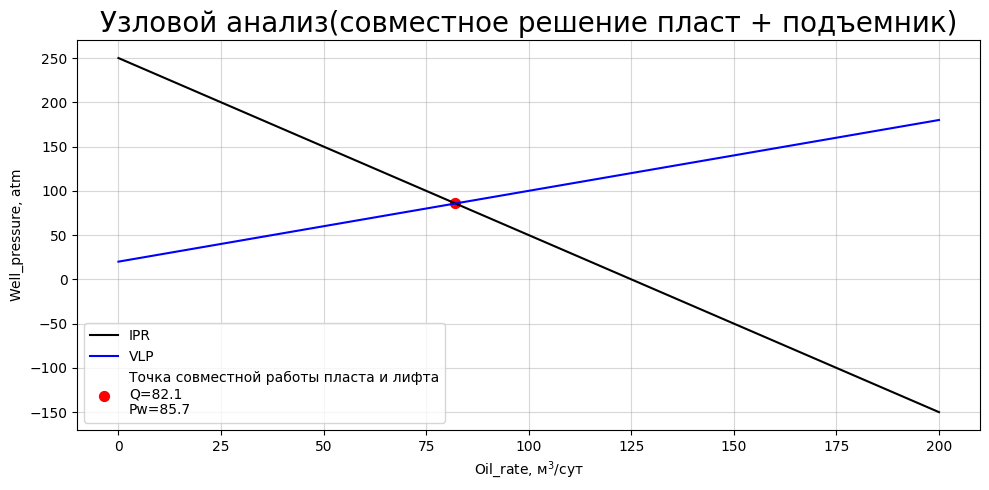

In [3]:
from nodal_analysis import IPRmodel, VLPmodel, NodalAnalysis

p_e = 250  # Пластовое давление, атм
p_w = 80  # Забойное даление, атм
buffer = 20  # Устьевое давление, бар

k_prod = 0.5  # Коэффициент продуктивности, м3/сут/бар

coeff_hydro = 0.8  # Коэффициент потерь, бар/(м3/сут)

q_max = 200  # Максимальный дебит, м3/сут

ipr_model = IPRmodel(k_prod, p_e, p_w)
vlp_model = VLPmodel(buffer, coeff_hydro)
analysis = NodalAnalysis(ipr_model, vlp_model)

analysis.plot_results(q_max)

## 3️⃣  Работа с init.py
**Задача:**

Настроить экспорт функций в пакете inflow_performance

inflow_performance/init.py

---



In [4]:
from nodal_analysis.solver.inflow_performance.ipr_model import IPRmodel

__all__ = ['IPRmodel']


## 4️⃣   Создание многоуровневого пакета


**Задача:**  

Свои пакеты для моделирования скважины и пласта сделайте подпакетами  nodal_analysis

---




In [5]:
import nodal_analysis.solver.inflow_performance


## 5️⃣ Создание requirements.txt

**Задача:**

Создать файл зависимостей для проекта вида

requirements.txt:

numpy>=1.21.0

pandas>=1.3.0

matplotlib>=3.4.0

scipy>=1.7.0

pytest>=6.2.0

---


In [6]:
pip freeze >= requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
with open(r"D:\Курсы\Python\Домашки Печко\2 семестр\IMA_project(ДЗ 11)\requirements.txt",'r') as file:
    content = file.read()

print(content)

aco==0.2.3
asttokens==2.4.1
certifi==2025.1.31
charset-normalizer==3.4.1
click==8.1.8
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.9
decorator==5.1.1
Deprecated==1.2.18
et_xmlfile==2.0.0
executing==2.1.0
fonttools==4.55.0
graphviz==0.20.3
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
mpmath==1.3.0
nest-asyncio==1.6.0
networkx==2.8.8
numpy==2.1.3
openpyxl==3.1.5
packaging==24.2
pandas==2.2.3
parso==0.8.4
pillow==11.0.0
platformdirs==4.3.6
plotly==5.24.1
prompt_toolkit==3.0.48
psutil==6.1.0
pure_eval==0.2.3
px==0.2.2
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
python_tsp==0.5.0
pytz==2024.2
pywin32==308
pyzmq==26.2.0
requests==2.32.3
scikit-learn==1.5.2
scipy==1.14.1
seaborn==0.13.2
six==1.16.0
sns==0.1
stack-data==0.6.3
sympy==1.13.3
tabulate==0.8.10
tenacity==9.0.0
threadpoolctl==3.5.0
tornado==6.4.2
traitlets==5